In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas_datareader.data as web

In [3]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
start_date=datetime.datetime(2012,1,1)
end_date=datetime.datetime(2022,1,1)

## Data Acquistion 

In [5]:
ford=web.DataReader("F",'yahoo',start_date,end_date)

In [6]:
tesla=web.DataReader("TSLA",'yahoo',start_date,end_date)

In [7]:
gm=web.DataReader("GM",'yahoo',start_date,end_date)

In [8]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.345917
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.458118
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.649522
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.728721
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.788121


In [9]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.232357
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.309464
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.096022
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.674370
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.612682


In [10]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667


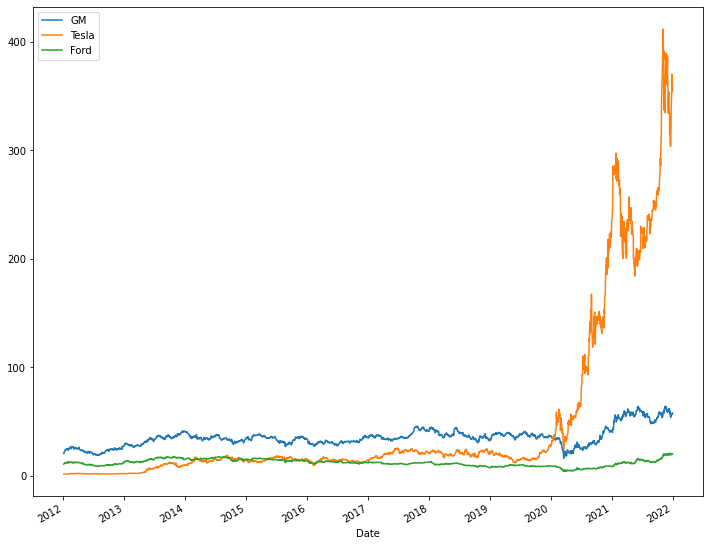

In [11]:
gm['Open'].plot(label='GM',figsize=(12,10))
tesla['Open'].plot(label='Tesla')

ford['Open'].plot(label='Ford')
plt.legend()

## Interpretation of the above graph

From 2012 to 2020, the GM stock price was higher than Ford and tesla but Tesla raced ahead after 2020 and then skyrocketed.


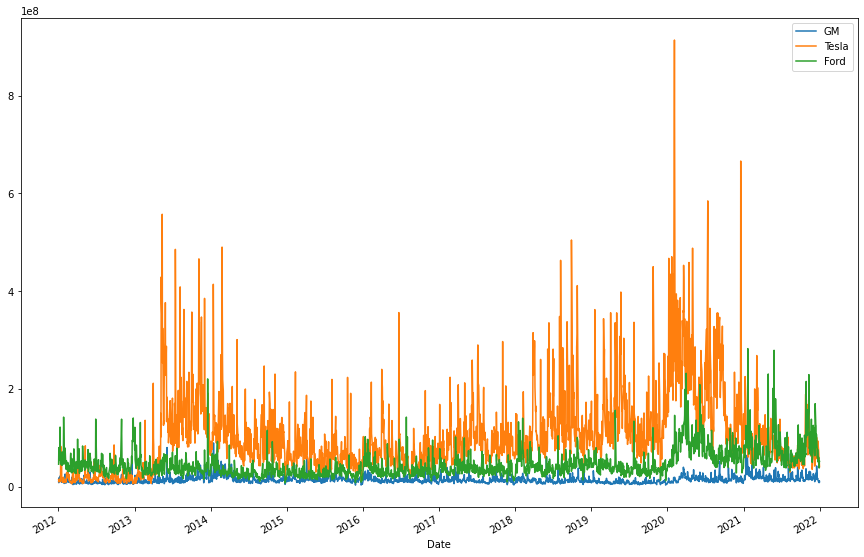

In [12]:
gm['Volume'].plot(label='GM',figsize=(15,10))
tesla['Volume'].plot(label='Tesla')

ford['Volume'].plot(label='Ford')
plt.legend()

In [13]:
tesla.iloc[[tesla['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-04,64.599335,55.591999,58.863998,59.137333,914082000.0,59.137333


<AxesSubplot:xlabel='Date'>

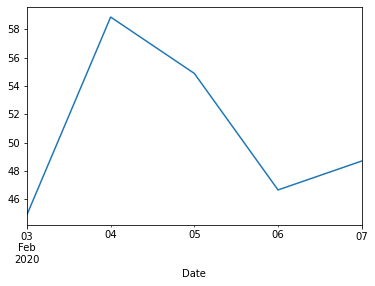

In [14]:
tesla.loc['2020-02-03':'2020-02-07'].Open.plot()

## Interpretation of the above graphs

Post mid 2021,the volume of stocks traded of Ford are more than GM and Tesla.
Furthermore,from the volume of stocks traded graph,we have analyzed the biggest spike in Tesla which came in early 2020 in Feb.
The volume of stocks traded for Tesla was highest on 2020-02-04 and after that the stock price dropped significantly.

## Moving Average
In the below graph, we have calculated and plotted the moving average of GM stock to smoothen the open price curve.
By analyzing the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

<AxesSubplot:xlabel='Date'>

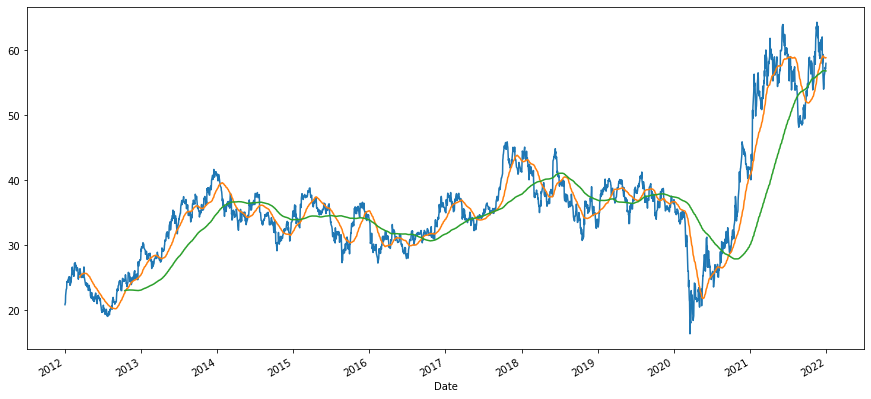

In [15]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm['Open'].plot(figsize = (15,7))
gm['MA50'].plot()
gm['MA200'].plot()

In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='gm', ylabel='gm'>,
        <AxesSubplot:xlabel='ford', ylabel='gm'>,
        <AxesSubplot:xlabel='tesla', ylabel='gm'>],
       [<AxesSubplot:xlabel='gm', ylabel='ford'>,
        <AxesSubplot:xlabel='ford', ylabel='ford'>,
        <AxesSubplot:xlabel='tesla', ylabel='ford'>],
       [<AxesSubplot:xlabel='gm', ylabel='tesla'>,
        <AxesSubplot:xlabel='ford', ylabel='tesla'>,
        <AxesSubplot:xlabel='tesla', ylabel='tesla'>]], dtype=object)

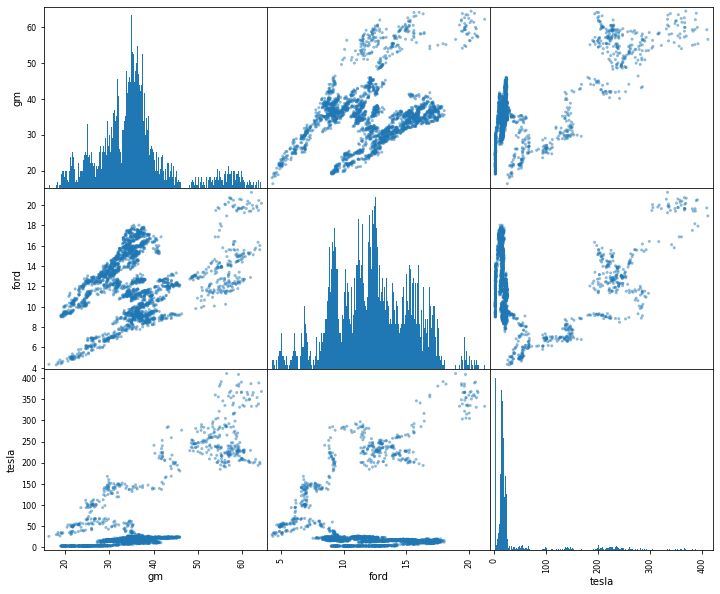

In [17]:
data = pd.concat([gm['Open'],ford['Open'],tesla['Open']],axis = 1)
data.columns = ['gm','ford','tesla']
scatter_matrix(data, figsize = (12,10), hist_kwds= {'bins':250})

## Interpretation of the scattered matrix
The scatter plots display that no stock has  exact linear relationship with the other stock since points in the plot are not clustered to form a straight line.Moreover Tesla  and GM stock is positively skewed while ford is more closer to a  symmetrical normal distribution.

In [31]:
pip install mplfinance

     |████████████████████████████████| 70 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Candlestick Chart

This chart enables to plot open,close,low and high price of a stock  for a given day in one graph.
A green candlestick means that the opening price on that day was lower than the closing price that day (i.e. the price moved up during the day); a red candlestick means that the opening price was higher than the closing price that day (i.e. the price moved down during the day).

In [50]:
import mplfinance as mpl
gm1=gm.loc['2020-02-01':'2020-02-15']
gm1=gm1[["High", "Low","Open","Close"]]
gm1.head(15)

,High,Low,Open,Close
Date,,,,
2020-02-03,34.340000,33.520000,33.560001,33.720001
2020-02-04,34.820000,34.200001,34.349998,34.369999
2020-02-05,35.450001,34.189999,34.900002,35.029999
2020-02-06,35.099998,34.250000,35.049999,34.330002
2020-02-07,34.160000,33.419998,34.080002,33.630001
2020-02-10,34.299999,33.669998,33.990002,34.250000
2020-02-11,35.259998,34.070000,34.340000,35.009998
2020-02-12,35.790001,35.130001,35.330002,35.490002
2020-02-13,35.529999,35.160000,35.209999,35.290001


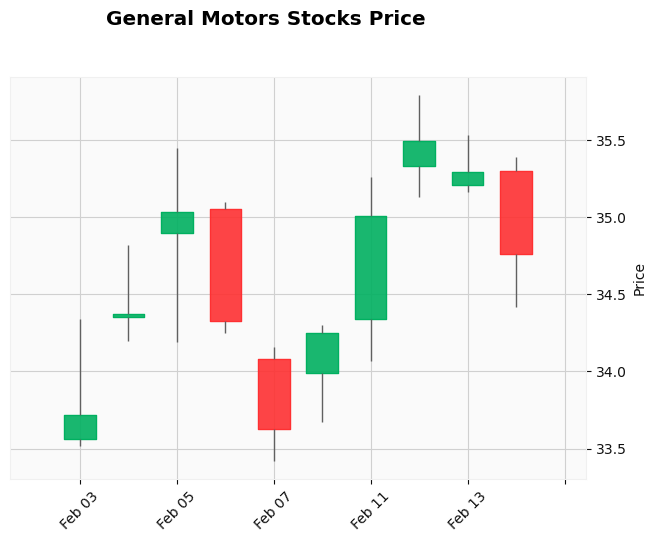

In [48]:
a="General Motors Stocks"
mpl.plot(
    gm1,
    type="candle", 
   
    title = f"{a} Price",  
    style="yahoo"
    )

In [20]:
## Calculating the daily percentage change

tesla['returns']=(tesla['Close']/tesla['Close'].shift(1))-1

In [21]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2012-01-03,1.966667,1.843333,1.929333,1.872000,13921500.0,1.872000,NaN
2012-01-04,1.911333,1.833333,1.880667,1.847333,9451500.0,1.847333,-0.013177
2012-01-05,1.862000,1.790000,1.850667,1.808000,15082500.0,1.808000,-0.021292
2012-01-06,1.852667,1.760667,1.813333,1.794000,14794500.0,1.794000,-0.007743
2012-01-09,1.832667,1.741333,1.800000,1.816667,13455000.0,1.816667,0.012635


In [22]:
gm['returns']=(gm['Close']/gm['Close'].shift(1))-1
gm.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.232357,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.309464,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.096022,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.674370,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.612682,NaN,NaN,-0.003490


In [23]:
ford['returns']=(ford['Close']/ford['Close'].shift(1))-1
ford.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.345917,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.458118,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.649522,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.728721,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.788121,0.007686


## Volatility Analysis of each stock

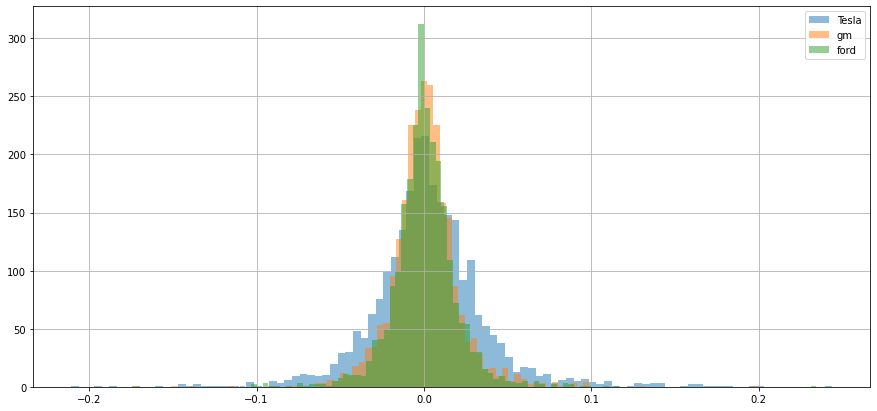

In [24]:
tesla['returns'].hist(bins = 100, label = 'Tesla', alpha = 0.5, figsize = (15,7))
gm['returns'].hist(bins = 100, label = 'gm', alpha = 0.5)
ford['returns'].hist(bins = 100, label = 'ford', alpha = 0.5)
plt.legend()

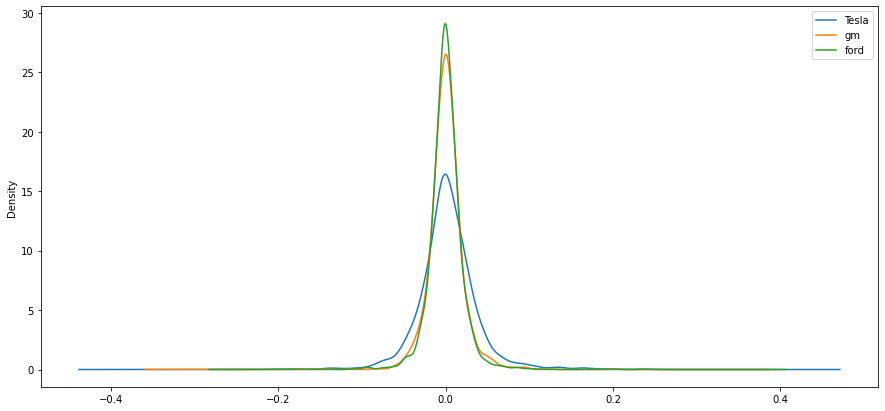

In [25]:
tesla['returns'].plot(kind='kde',label = 'Tesla',figsize = (15,7))
gm['returns'].plot( kind='kde',label = 'gm')
ford['returns'].plot(kind='kde', label = 'ford')
plt.legend()

## Interpretation of the above graphs

The above Kernal distribution estimate plot represents the data using a continuous probability density curve.It is evident that the kde curve of Tesla is the widest which indicates that Tesla is the most volatile.